In [1]:
#import libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib notebook


In [2]:
# import csv
csv_path="Resources\FedData.csv"
csv = pd.read_csv(csv_path)
fed_df=pd.DataFrame(csv)

In [3]:
inflation_rate = fed_df.groupby("Year").mean()
inflation_rate

,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
Year,,,,,,,,,
1954,9.500000,1.000000,NaN,NaN,NaN,1.006667,6.300,5.650000,NaN
1955,6.500000,1.000000,NaN,NaN,NaN,1.785000,6.625,4.366667,NaN
1956,6.500000,1.000000,NaN,NaN,NaN,2.728333,2.075,4.125000,NaN
1957,6.500000,1.000000,NaN,NaN,NaN,3.105000,0.425,4.300000,NaN
1958,6.500000,1.000000,NaN,NaN,NaN,1.572500,2.975,6.841667,2.283333
1959,6.500000,1.000000,NaN,NaN,NaN,3.305000,4.650,5.450000,1.991667
1960,6.500000,1.000000,NaN,NaN,NaN,3.215833,0.975,5.541667,1.525000
1961,6.500000,1.000000,NaN,NaN,NaN,1.955000,6.350,6.691667,1.125000
1962,6.500000,1.000000,NaN,NaN,NaN,2.708333,4.325,5.566667,1.375000


In [4]:
#show inflation rate column only
#get mean inflation rate by year
inflation_rate = fed_df.groupby(fed_df["Year"]).mean()["Inflation Rate"]
inflation_rate_df = pd.DataFrame(inflation_rate)
inflation_rate_df = inflation_rate_df.drop([1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962])
inflation_rate_df.head()

,Inflation Rate
Year,
1963,1.275000
1964,1.500000
1965,1.441667
1966,2.416667
1967,3.475000


In [5]:
#import census data and calculate Housing sold for years 1963-2017. 
csv_path2="Resources\CensusData.csv"
csv2 = pd.read_csv(csv_path2)
housing_df=pd.DataFrame(csv2)
housing_df=housing_df.rename(index=str, columns={"United States": "United States home sales", 
                                                 "South": "South home sales", 
                                                 "West": "West home sales"})
#del housing_df["United States"]
housing_df.head()

,Year,United States home sales,South home sales,West home sales
0,1963,560,199,141
1,1964,565,200,129
2,1965,575,210,129
3,1966,461,166,99
4,1967,487,179,119


In [6]:
# merge dataframes
S_W_Inflation_df=pd.merge(inflation_rate_df,housing_df, on="Year")
S_W_Inflation_df.head()

,Year,Inflation Rate,United States home sales,South home sales,West home sales
0,1963,1.275000,560,199,141
1,1964,1.500000,565,200,129
2,1965,1.441667,575,210,129
3,1966,2.416667,461,166,99
4,1967,3.475000,487,179,119


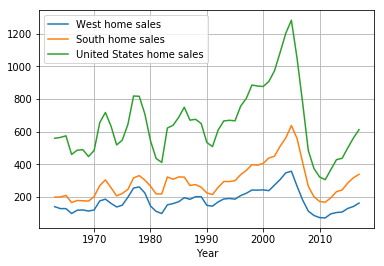

In [7]:
#Create single line graph
S_W_Inflation_df.plot("Year", ["West home sales", "South home sales", "United States home sales"], kind="line")
plt.grid()

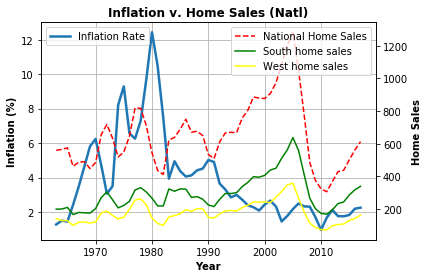

In [10]:
#Create a line chart of inflation (above) and home sales per year from 1963-2018
home_sales=[]
south_sales=[]
west_sales=[]
for sale in S_W_Inflation_df["United States home sales"]:
    int_US_sales=int(sale)
    home_sales.append(int_US_sales)
for sale in S_W_Inflation_df["South home sales"]:
    int_south_sales=int(sale)
    south_sales.append(int_south_sales)
for sale in S_W_Inflation_df["West home sales"]:
    int_west_sales=int(sale)
    west_sales.append(int_west_sales)
fig, ax1=plt.subplots()
x=np.arange(1963,2018)
n=S_W_Inflation_df["Inflation Rate"]
ax1.plot(x,n, linewidth=2.5)
ax2=ax1.twinx()
ax2.plot(x,S_W_Inflation_df["United States home sales"],color="r", linestyle="--",label="National Home Sales")
ax2.plot(x,S_W_Inflation_df["South home sales"], color="g", label="South home sales")
ax2.plot(x,S_W_Inflation_df["West home sales"], color="yellow", label="West home sales")
ax1.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
ax1.set_title("Inflation v. Home Sales (Natl)", fontweight="bold")
ax1.set_xlabel("Year", fontweight="bold")
ax1.set_ylabel("Inflation (%)", fontweight="bold")
ax2.set_ylabel("Home Sales", fontweight="bold")
plt.savefig("Graph Images/Inflation_Home_Sales_john.png")
